In [135]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

import bvcopula
import utils
import marginal as mg

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [136]:
path_models = '/home/nina/models'
path_exp = '/home/nina/VRData/Processing/pkls'
beh = 5

In [138]:
animal = 'ST263'
d = {
    'ST260': 104,
    'ST262': 61,
    'ST263': 23,
    'ST264': 34
}
N_max = d[animal]
dayN = 2
day_name = f"Day{dayN}"
exp_pref = f"{animal}_{day_name}"

In [139]:
X,Y = utils.load_experimental_data(path_exp, animal, day_name, 3, 19)
order = np.argsort(X[:,0])

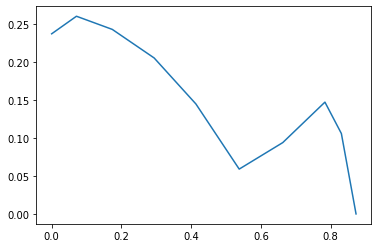

In [140]:
batch_size = 2000
shift = 2000
length = Y.shape[0]//batch_size
J = int(batch_size/shift)
p = np.zeros(length*J-(J-1))
for j in range(J):
    batches = (Y[order])[shift*j:(length-1)*batch_size+shift*j].reshape((-1,batch_size,2))
    for i,b in enumerate(batches):
        p[J*i+j] = np.corrcoef(*b.T)[0,1]
stim = X[order][:(length-1)*batch_size+1:shift]
#print(stim.shape,p.shape)
plt.plot(stim,p)

In [141]:
Hs = (-np.log(1-np.abs(p))/2/np.log(2)).mean()
p_all = np.corrcoef(*Y.T)[0,1]
H = (-np.log(1-np.abs(p_all))/2/np.log(2))
Hs-H

-0.01312844675791272

In [142]:
mg.revised_mi(stim.reshape(-1,1).tolist(),p.reshape(-1,1).tolist())

0.002040271655526421

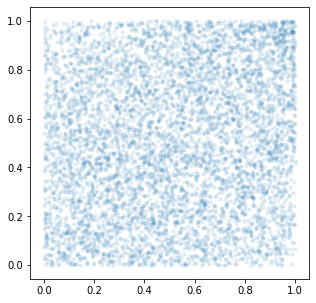

In [143]:
X,Y = utils.load_experimental_data(path_exp, animal, day_name, 3, 19)
plt.figure(figsize=(5,5))
plt.scatter(*Y[(X[:,0]>0.7)&(X[:,0]<0.9)].T,alpha=0.1,s=10)

In [144]:
from scipy.special import psi
batch_size = 2000
res = np.zeros((N_max+beh,N_max+beh))
k = 1/(2*np.log(2))
for n1 in range(-beh,N_max-1):
    for n2 in range(n1+1,N_max):
        X,Y = utils.load_experimental_data(path_exp, animal, day_name, n1, n2)
        order = np.argsort(X[:,0])
        length = Y.shape[0]//batch_size
        p = np.zeros(length)
        batches = (Y[order])[:length*batch_size].reshape((-1,batch_size,2))
        for i,b in enumerate(batches):
            p[i] = np.corrcoef(*b.T)[0,1]
        p_all = np.corrcoef(*Y[:length*batch_size].T)[0,1]
        batches = (X[order])[:length*batch_size].reshape((-1,batch_size))
        stim = batches.mean(axis=-1)
        Hs = (k*np.log(1-p**2)).mean()
        H = (k*np.log(1-p_all**2))
        res[n1+beh,n2+beh] = Hs-H
    #print(n1)

/home/nina/LFI/utils/data_loader.py:42: RuntimeWarning: invalid value encountered in greater
  & (Y_all[:,0]<1) & (Y_all[:,1]<1)
/home/nina/LFI/utils/data_loader.py:42: RuntimeWarning: invalid value encountered in less
  & (Y_all[:,0]<1) & (Y_all[:,1]<1)


In [145]:
# r = -res.flatten()
# r1 = r
# mask = (r1>0.01) | (r2>0.01)
# plt.scatter(r1[mask],r2[mask])
# x = np.linspace(0.04,0.12,100)
# plt.plot(x,x)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          2.,   1.,   3.,   7.,   8.,  25.,  92., 234.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.17339902, -0.1675446 , -0.16169018, -0.15583575, -0.14998133,
        -0.14412691, -0.13827249, -0.13241807, -0.12656364, -0.12070922,
        -0.1148548 , -0.10900038, -0.10314595, -0.09729153, -0.09143711,
        -0.08558269, -0.07972827, -0.07387384, -0.06801942, -0.062165  ,
        -0.05631058, -0.05045616, -0.04460173, -0.03874731, -0.03289289,
        -0.02703847, -0.02118405, -0.01532962, -0.0094752 , -0.00362078,
         0.00223364,  0.00808807,  0.01394249,  0.01979691,  0.02565133,
         0.03150575,  0.03736018,  0.0432146 ,  0.04906902,  0.05492344,
         0.06077786,  0.06663229,  0.07248671,  0.07834113,  0.08419555,
 

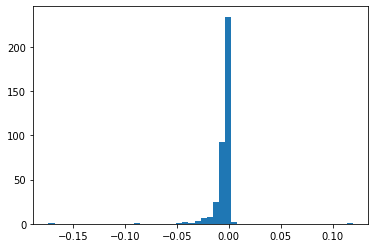

In [146]:
plt.hist(res.flatten()[res.flatten()!=0],bins=50)

In [147]:
with open(f"{path_models}/MI_measures/{exp_pref}_linearMI.pkl","wb") as f:
    pkl.dump(res,f)

In [148]:
with open(f"{path_models}/MI_measures/{exp_pref}_linearMI.pkl","rb") as f:
    data = pkl.load(f)